
# Law of Cosines Positioning Algorithm

### Overview
This algorithm calculates the 2D position of an On-Board Unit (OBU) using distance measurements from two fixed Road-Side Units (RSUs). The approach leverages the Law of Cosines to solve for position when three sides of a triangle are known.

### Mathematical Foundation

Given a triangle with three known sides, the Law of Cosines allows us to find any interior angle:

```
cos(θ) = (a² + c² - b²) / (2ac)
```

Where:
- **a** = d₁ (distance from RSU1 to OBU)
- **b** = d₂ (distance from RSU2 to OBU)  
- **c** = baseline (known distance between RSU1 and RSU2)
- **θ** = angle at RSU1

### Algorithm Flow

1. **Input Validation**: Verify triangle inequality: `d₁ + d₂ > baseline`

2. **Angle Calculation**: Apply Law of Cosines to find angle θ at RSU1:
   ```
   cos(θ) = (d₁² + baseline² - d₂²) / (2 × d₁ × baseline)
   ```

3. **Position Calculation**: Convert polar coordinates to Cartesian:
   ```
   x = d₁ × sin(θ)
   y = d₁ × cos(θ)
   ```

### Inputs/Outputs
- **Input**: Two distance measurements (d₁, d₂) from RSSI calibration
- **Output**: 2D coordinates (x, y) or None if invalid triangle

### RSU Placement
- **RSU1**: Origin point (0, 0)
- **RSU2**: Positioned at (0, baseline) - creates vertical baseline
- **OBU**: Calculated position (x, y) relative to RSU1


---


## Algorithm Implementation

In [37]:
import math

def calculate_obu_position(d1, d2, baseline=50):
    """
    Calculate OBU position using Law of Cosines
    
    Args:
        d1: Distance from RSU1 to OBU (meters)
        d2: Distance from RSU2 to OBU (meters) 
        baseline: Distance between RSU1 and RSU2 (meters, default=50)
    
    Returns:
        Tuple (x, y) of OBU position, or None if invalid triangle
    """
    # Check triangle inequality
    if not (d1 + d2 > baseline and d1 + baseline > d2 and d2 + baseline > d1):
        return None
    
    # Law of Cosines: cos(θ) = (a² + c² - b²) / (2ac)
    # θ = angle at RSU1, a = d1, b = d2, c = baseline
    cos_theta = (d1**2 + baseline**2 - d2**2) / (2 * d1 * baseline)
    
    # Clamp to valid range for arccos
    cos_theta = max(-1, min(1, cos_theta))
    theta = math.acos(cos_theta)
    
    # Calculate position (angle θ measured from +Y axis since baseline is vertical)
    x = d1 * math.sin(theta)  
    y = d1 * math.cos(theta)
    
    return (x, y)

In [39]:
d1, d2 = 30.0, 40.0
pos = calculate_obu_position(d1, d2)
print(f"d1={d1}m, d2={d2}m → Position: {pos}")

d1=30.0m, d2=40.0m → Position: (24.0, 18.0)


## Visualization

Testing with d1=50.0m, d2=60.0m
Calculated Positon: x = 48.0, y = 14.000000000000002


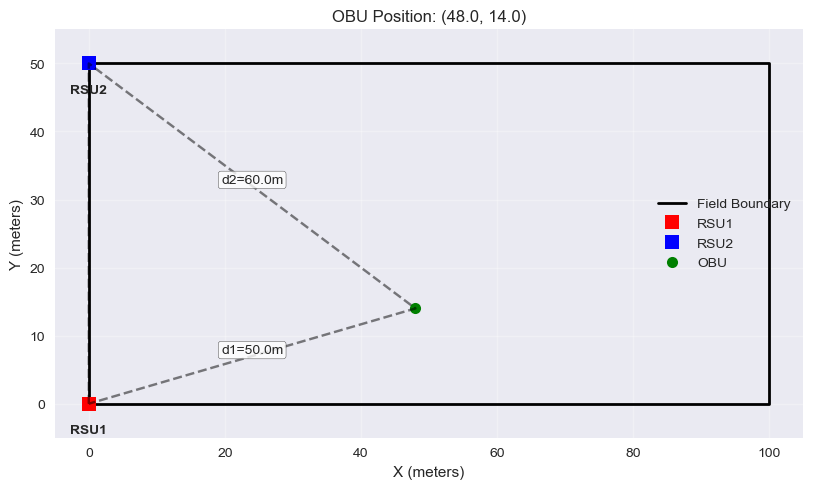

In [71]:
import matplotlib.pyplot as plt

def visualize_positioning(d1, d2, baseline=50):
    """
    Visualize OBU positioning on 100x50m field
    
    Args:
        d1: Distance from RSU1 to OBU (meters)
        d2: Distance from RSU2 to OBU (meters)
        baseline: Distance between RSUs (meters)
    """
    # Calculate position
    position = calculate_obu_position(d1, d2, baseline)
   
    print(f"Calculated Positon: x = {position[0]}, y = {position[1]}")
    
    
    # Create plot
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Field dimensions (100m x 50m)
    field_width, field_height = 100, 50
    
    # Draw field boundary
    ax.plot([0, field_width, field_width, 0, 0], 
            [0, 0, field_height, field_height, 0], 
            'k-', linewidth=2, label='Field Boundary')
    
    # RSU positions (corners of 50m side - vertical baseline)
    rsu1_x, rsu1_y = 0, 0   # RSU1 - Origin
    rsu2_x, rsu2_y = 0, 50  # RSU2 - 50m above RSU1
    
    # Plot RSUs
    ax.plot(rsu1_x, rsu1_y, 'rs', markersize=10, label='RSU1')
    ax.plot(rsu2_x, rsu2_y, 'bs', markersize=10, label='RSU2')
    
    # Annotate RSUs
    ax.text(rsu1_x, rsu1_y-3, 'RSU1', ha='center', va='top', fontweight='bold')
    ax.text(rsu2_x, rsu2_y-3, 'RSU2', ha='center', va='top', fontweight='bold')
    
    if position:
        # Position is already relative to RSU1 at origin
        obu_x, obu_y = position[0], position[1]
        
        # Plot OBU
        ax.plot(obu_x, obu_y, 'go', markersize=8, label='OBU')
        
        # Draw triangle
        ax.plot([rsu1_x, rsu2_x, obu_x, rsu1_x], 
                [rsu1_y, rsu2_y, obu_y, rsu1_y], 
                'k--', alpha=0.5)
        
        # Annotate distances
        ax.text((rsu1_x + obu_x)/2, (rsu1_y + obu_y)/2, f'd1={d1:.1f}m', 
                ha='center', va='bottom', bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8))
        ax.text((rsu2_x + obu_x)/2, (rsu2_y + obu_y)/2, f'd2={d2:.1f}m', 
                ha='center', va='bottom', bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8))
        
        ax.set_title(f'OBU Position: ({position[0]:.1f}, {position[1]:.1f})')
    else:
        ax.set_title('Invalid Triangle - Cannot Calculate Position')
    
    ax.set_xlim(-5, 105)
    ax.set_ylim(-5, 55)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.legend()
    ax.set_xlabel('X (meters)')
    ax.set_ylabel('Y (meters)')
    
    plt.tight_layout()
    plt.show()

# Test the visualization
if __name__ == "__main__":
    # Example: OBU distances
    d1 = 50.0  # Distance from RSU1
    d2 = 60.0  # Distance from RSU2
    
    print(f"Testing with d1={d1}m, d2={d2}m")
    visualize_positioning(d1, d2)